In [71]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Importing the MNIST Dataset

In [72]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [73]:
len(X_train)

60000

In [74]:
len(X_test)

10000

In [75]:
X_train[0].shape

(28, 28)

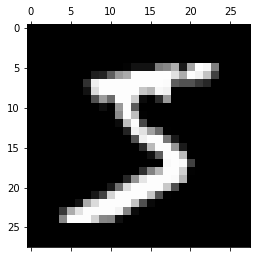

In [76]:
plt.matshow(X_train[0], cmap='gray')

In [77]:
#normalize

X_train = X_train/255
X_test = X_test/255

#### Flattening out the 28*28 image into a single array.

In [78]:
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened= X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [79]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4867 - acc: 0.8787
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.3062 - acc: 0.9154
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2854 - acc: 0.9209
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2750 - acc: 0.9240
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2678 - acc: 0.9265
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2629 - acc: 0.9274
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2590 - acc: 0.9280
Epoch 8/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2555 - acc: 0.9293
Epoch 9/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2525 - acc: 0.9310
Epoch 10/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2507 - acc: 0.9308

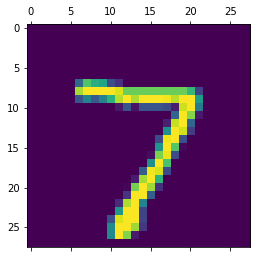

In [80]:
plt.matshow(X_test[0])

In [81]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([7.9940449e-08, 7.9745247e-15, 3.1671829e-07, 3.0458407e-03,
       4.4495852e-08, 2.2998083e-05, 8.4743132e-14, 5.4213208e-01,
       1.0824298e-05, 3.0311701e-04], dtype=float32)

In [82]:
y_predicted[0].max() 

#to print the index

np.argmax(y_predicted[0])

7

##### gg


In [83]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [84]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

##### gg

In [85]:
matrix = tf.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
matrix.shape


TensorShape([Dimension(10), Dimension(10)])

In [99]:
newMatrix = tf.Session().run(matrix)
type(newMatrix)

numpy.ndarray

Text(69,0.5,'RIYAL')

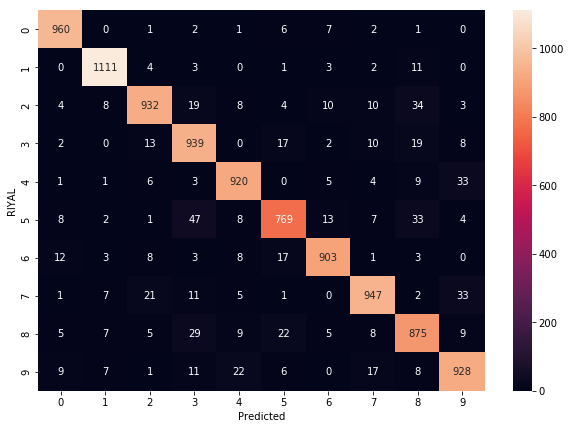

In [101]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(newMatrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('RIYAL')